In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews/subwords8k",with_info = True,as_supervised=True)

In [3]:
train_data, test_data = imdb['train'] , imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
tokenizer

<SubwordTextEncoder vocab_size=8185>

In [28]:
ab = tokenizer.encode('abhishek maity is nice!')
for i in ab:
    print(i,"----->",tokenizer.decode([i]))

938 -----> ab
1282 -----> his
227 -----> he
231 -----> k 
760 -----> ma
472 -----> ity 
9 -----> is 
3324 -----> nice
7962 -----> !


In [6]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [7]:
print(tokenizer.vocab_size)

8185


In [9]:
sample_string = "Tensorflow 2.x from basics to mastery!"

tokenized_string = tokenizer.encode(sample_string)
print('The Tokenized string is :',tokenized_string)

original_string = tokenizer.decode(tokenized_string)
print('The Original String is : ',original_string)

The Tokenized string is : [6307, 2327, 2934, 7961, 7979, 7975, 539, 48, 4249, 4429, 7, 2652, 8050, 7962]
The Original String is :  Tensorflow 2.x from basics to mastery!


In [13]:
for i in tokenized_string:
    print('{}------>{}'.format(i,tokenizer.decode([i])))

6307------>Ten
2327------>sor
2934------>flow
7961------> 
7979------>2
7975------>.
539------>x 
48------>from 
4249------>basi
4429------>cs 
7------>to 
2652------>master
8050------>y
7962------>!


In [16]:
buffer_size = 10000
batch_size = 64


train_dataset = train_data.shuffle(buffer_size)
train_dataset = train_dataset.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_data.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(test_data))

In [29]:
tf.compat.v1.data.get_output_shapes(train_dataset)

(TensorShape([None, None]), TensorShape([None]))

In [21]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 10
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist = model.fit(train_dataset,epochs=num_epochs,validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 14s 35ms/step - loss: 0.6764 - accuracy: 0.6178 - val_loss: 0.6293 - val_accuracy: 0.7652
Epoch 2/10
391/391 [==============================] - 10s 25ms/step - loss: 0.5204 - accuracy: 0.8044 - val_loss: 0.4477 - val_accuracy: 0.8293
Epoch 3/10
391/391 [==============================] - 10s 25ms/step - loss: 0.3697 - accuracy: 0.8706 - val_loss: 0.3628 - val_accuracy: 0.8608
Epoch 4/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2982 - accuracy: 0.8931 - val_loss: 0.3288 - val_accuracy: 0.8726
Epoch 5/10
391/391 [==============================] - 10s 24ms/step - loss: 0.2607 - accuracy: 0.9086 - val_loss: 0.3140 - val_accuracy: 0.8768
Epoch 6/10
391/391 [==============================] - 10s 24ms/step - loss: 0.2348 - accuracy: 0.9171 - val_loss: 0.3061 - val_accuracy: 0.8817
Epoch 7/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2144 - accuracy: 0.9238 - val_loss: 0.3062 - val_accuracy:

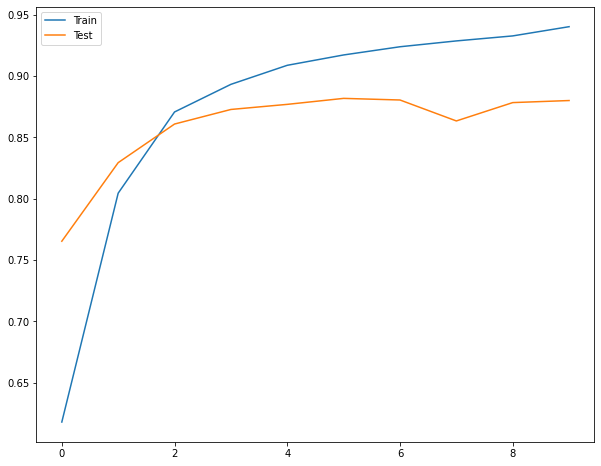

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Test'])


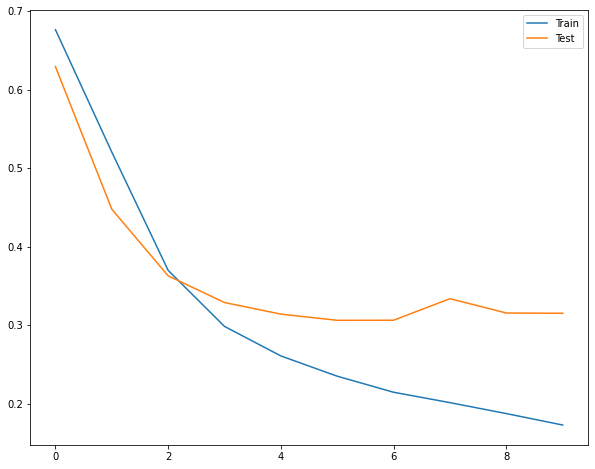

In [31]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train','Test'])